In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv("bank-full.csv",sep=';')

In [3]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

<AxesSubplot:>

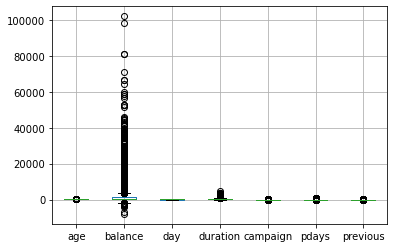

In [7]:
df.boxplot()

In [8]:
def outlier_detection(data, colname):
    q1 = df[colname].quantile(0.25)
    q3 = df[colname].quantile(0.75)
    
    IQR = q3 - q1
    
    lower = q1 - (1.5 * IQR)
    upper = q3 + (1.5 * IQR)
    
    return lower, upper

In [9]:
outlier_detection(df, df.columns)

(age           10.5
 balance    -1962.0
 day          -11.5
 duration    -221.0
 campaign      -2.0
 pdays         -1.0
 previous       0.0
 dtype: float64,
 age           70.5
 balance     3462.0
 day           40.5
 duration     643.0
 campaign       6.0
 pdays         -1.0
 previous       0.0
 dtype: float64)

In [10]:
df.loc[df['age']>70.5, 'age'] = 70.5

In [11]:
df.loc[df['balance']>3462.0, 'balance'] = 3462.0

In [12]:
df.loc[df['duration']>643.0, 'duration'] = 643.0

In [13]:
df.loc[df['campaign']> 6.0, 'campaign'] = 6.0

In [14]:
df.loc[df['pdays']>  -1.0, 'pdays'] =  -1.0

In [15]:
df.loc[df['previous']>  0.0, 'previous'] =  0.0

In [16]:
df.loc[df['balance'] < -1962.0, 'balance'] = -1962.0

<AxesSubplot:>

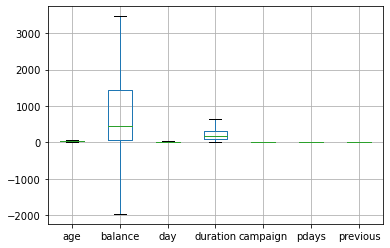

In [17]:
df.boxplot()

In [18]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58.0,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44.0,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47.0,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33.0,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,technician,married,tertiary,no,825,no,no,cellular,17,nov,643,3,-1,0,unknown,yes
45207,70.5,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,70.5,retired,married,secondary,no,3462,no,no,cellular,17,nov,643,5,-1,0,success,yes
45209,57.0,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [19]:
df.describe(include=object)

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


In [20]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [21]:
df['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [22]:
df['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [23]:
df['default'].unique()

array(['no', 'yes'], dtype=object)

In [24]:
df['housing'].unique()

array(['yes', 'no'], dtype=object)

In [25]:
df['loan'].unique()

array(['no', 'yes'], dtype=object)

In [26]:
df['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [27]:
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [28]:
df['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [29]:
df['y'].unique()

array(['no', 'yes'], dtype=object)

In [30]:
df.replace(['yes','no'], [1,0], inplace=True)

In [31]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58.0,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44.0,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33.0,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47.0,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33.0,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,technician,married,tertiary,0,825,0,0,cellular,17,nov,643,3,-1,0,unknown,1
45207,70.5,retired,divorced,primary,0,1729,0,0,cellular,17,nov,456,2,-1,0,unknown,1
45208,70.5,retired,married,secondary,0,3462,0,0,cellular,17,nov,643,5,-1,0,success,1
45209,57.0,blue-collar,married,secondary,0,668,0,0,telephone,17,nov,508,4,-1,0,unknown,0


In [32]:
df['education'].replace(['tertiary', 'secondary', 'unknown', 'primary'], [3,2,0,1], inplace=True)

In [33]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58.0,management,married,3,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44.0,technician,single,2,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33.0,entrepreneur,married,2,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47.0,blue-collar,married,0,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33.0,unknown,single,0,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,technician,married,3,0,825,0,0,cellular,17,nov,643,3,-1,0,unknown,1
45207,70.5,retired,divorced,1,0,1729,0,0,cellular,17,nov,456,2,-1,0,unknown,1
45208,70.5,retired,married,2,0,3462,0,0,cellular,17,nov,643,5,-1,0,success,1
45209,57.0,blue-collar,married,2,0,668,0,0,telephone,17,nov,508,4,-1,0,unknown,0


In [34]:
df['month'].replace(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], [5,6,7,8,10,11,12,1,2,3,4,9], inplace=True)

In [35]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58.0,management,married,3,0,2143,1,0,unknown,5,5,261,1,-1,0,unknown,0
1,44.0,technician,single,2,0,29,1,0,unknown,5,5,151,1,-1,0,unknown,0
2,33.0,entrepreneur,married,2,0,2,1,1,unknown,5,5,76,1,-1,0,unknown,0
3,47.0,blue-collar,married,0,0,1506,1,0,unknown,5,5,92,1,-1,0,unknown,0
4,33.0,unknown,single,0,0,1,0,0,unknown,5,5,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,technician,married,3,0,825,0,0,cellular,17,11,643,3,-1,0,unknown,1
45207,70.5,retired,divorced,1,0,1729,0,0,cellular,17,11,456,2,-1,0,unknown,1
45208,70.5,retired,married,2,0,3462,0,0,cellular,17,11,643,5,-1,0,success,1
45209,57.0,blue-collar,married,2,0,668,0,0,telephone,17,11,508,4,-1,0,unknown,0


In [36]:
df['marital'].replace(['married', 'single', 'divorced'],[3,1,2], inplace=True)

In [37]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58.0,management,3,3,0,2143,1,0,unknown,5,5,261,1,-1,0,unknown,0
1,44.0,technician,1,2,0,29,1,0,unknown,5,5,151,1,-1,0,unknown,0
2,33.0,entrepreneur,3,2,0,2,1,1,unknown,5,5,76,1,-1,0,unknown,0
3,47.0,blue-collar,3,0,0,1506,1,0,unknown,5,5,92,1,-1,0,unknown,0
4,33.0,unknown,1,0,0,1,0,0,unknown,5,5,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,technician,3,3,0,825,0,0,cellular,17,11,643,3,-1,0,unknown,1
45207,70.5,retired,2,1,0,1729,0,0,cellular,17,11,456,2,-1,0,unknown,1
45208,70.5,retired,3,2,0,3462,0,0,cellular,17,11,643,5,-1,0,success,1
45209,57.0,blue-collar,3,2,0,668,0,0,telephone,17,11,508,4,-1,0,unknown,0


In [38]:
df.drop(columns=['job','contact','poutcome'], inplace=True)

In [39]:
df

,age,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
0,58.0,3,3,0,2143,1,0,5,5,261,1,-1,0,0
1,44.0,1,2,0,29,1,0,5,5,151,1,-1,0,0
2,33.0,3,2,0,2,1,1,5,5,76,1,-1,0,0
3,47.0,3,0,0,1506,1,0,5,5,92,1,-1,0,0
4,33.0,1,0,0,1,0,0,5,5,198,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,3,3,0,825,0,0,17,11,643,3,-1,0,1
45207,70.5,2,1,0,1729,0,0,17,11,456,2,-1,0,1
45208,70.5,3,2,0,3462,0,0,17,11,643,5,-1,0,1
45209,57.0,3,2,0,668,0,0,17,11,508,4,-1,0,0


In [40]:
X = df.iloc[:, :-1]
y = df['y']

In [41]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [42]:
X = sc.fit_transform(X)

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [44]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [45]:
lr.fit(X_train, y_train)

LogisticRegression()

In [47]:
ypred = lr.predict(X_test)

In [48]:
from sklearn.metrics import confusion_matrix, classification_report

In [49]:
confusion_matrix(y_test, ypred)

array([[7751,  201],
       [ 872,  219]], dtype=int64)

In [50]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94      7952
           1       0.52      0.20      0.29      1091

    accuracy                           0.88      9043
   macro avg       0.71      0.59      0.61      9043
weighted avg       0.85      0.88      0.86      9043

